# Data Exploration - Extended Validation

In [1]:
import os, random, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from tqdm import tqdm

In [2]:
DATASETS_FOLDER = "./datasets"
PATH_BRACOL = DATASETS_FOLDER + "/bracol/symptom"
PATH_PLANT_PATOLOGIES = DATASETS_FOLDER + "/plant_patologies"
PATH_ROCOLE = DATASETS_FOLDER + "/rocole/Photos"

## 1. Opening a image from each dataset

In [3]:
def choose_random_image_from_dataset(dataset_path):
    """Choose a random image from a dataset."""
    
    images = []

    for root, _, files in os.walk(dataset_path):
        for file in files:
            if (".jpg" in file) or (".png" in file):
                images.append(f"{root}/{file}")

    image_chosen = random.choices(images)[0]
    
    return image_chosen

In [4]:
dataset_paths = {
    "BRACOL": PATH_BRACOL, 
    "Plant Patologies": PATH_PLANT_PATOLOGIES, 
    "RoCoLe": PATH_ROCOLE
}

>> Dataset: BRACOL
>> Image chosen: ./datasets/bracol/symptom/val/1_health/911_1386_0485_0224_0268.jpg
>> Image original size: (224, 268)



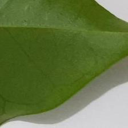


>> Dataset: Plant Patologies
>> Image chosen: ./datasets/plant_patologies/rust_xml_image/name238.jpg
>> Image original size: (4000, 2250)



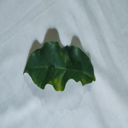


>> Dataset: RoCoLe
>> Image chosen: ./datasets/rocole/Photos/C6P11H2.jpg
>> Image original size: (1280, 720)



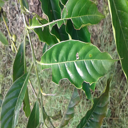

In [5]:
for dataset_name in dataset_paths:
    image_path = choose_random_image_from_dataset(dataset_paths[dataset_name])
    image = Image.open(image_path)

    print(f">> Dataset: {dataset_name}")
    print(">> Image chosen:", image_path)
    print(">> Image original size:", image.size)
    print()

    image = image.resize((128, 128))
    image.show()
    
    print()

## 2. Defining functions to plot images distribution

In [6]:
def calculating_total_of_images(files_per_directory):
    """Calculate total of images in dataset."""
    
    total_images = 0
    
    for value in files_per_directory.values():
        total_images += value
    
    return total_images

In [7]:
def calculating_distribution(files_per_directory, total_images):
    """Calculate sample distribution per dataset class."""
    
    dataset_info = {}
    
    for key, value in zip(files_per_directory.keys(), files_per_directory.values()):
        data = str(round((value/total_images)*100, 2)) + '%'
        dataset_info[key] = [value, data]
    
    return dataset_info

## 3. Exploring each dataset

### 3.1. BRACOL

#### Number of directories

In [8]:
directories = []

In [9]:
for root, _, _ in os.walk(PATH_BRACOL):
    directory = root.split('/')[3:]
    directory = '/'.join(directory)
    
    if (len(directory) > 0) and (".ipynb_checkpoints" not in directory):
        directories.append(directory)

In [10]:
print(PATH_BRACOL + f": {len(directories)} directory(ies)")
for directory in directories:
    print(f">> {directory}")

./datasets/bracol/symptom: 19 directory(ies)
>> symptom
>> symptom/val
>> symptom/val/3_rust
>> symptom/val/1_health
>> symptom/val/2_miner
>> symptom/val/5_cercospora
>> symptom/val/4_phoma
>> symptom/test
>> symptom/test/3_rust
>> symptom/test/1_health
>> symptom/test/2_miner
>> symptom/test/5_cercospora
>> symptom/test/4_phoma
>> symptom/train
>> symptom/train/3_rust
>> symptom/train/1_health
>> symptom/train/2_miner
>> symptom/train/5_cercospora
>> symptom/train/4_phoma


#### Number of images in each directories

In [11]:
files_per_directory = {}

In [12]:
for root, _, files in os.walk(PATH_BRACOL):
    path = os.path.join(root)
    
    if ".ipynb_checkpoints" not in path:
        files_per_directory[f"{root}"] = 0

        for file in files:
            filepath = os.path.join(root, file)

            try:
                with Image.open(filepath) as image:
                    files_per_directory[f"{root}"] += 1
            except Exception as e:
                pass

In [13]:
files_per_directory = {key: value for key, value in files_per_directory.items() if value != 0}

In [14]:
for directory in files_per_directory:
    print(f"{directory}: {files_per_directory[directory]} images")

./datasets/bracol/symptom/val/3_rust: 93 images
./datasets/bracol/symptom/val/1_health: 40 images
./datasets/bracol/symptom/val/2_miner: 83 images
./datasets/bracol/symptom/val/5_cercospora: 49 images
./datasets/bracol/symptom/val/4_phoma: 70 images
./datasets/bracol/symptom/test/3_rust: 94 images
./datasets/bracol/symptom/test/1_health: 39 images
./datasets/bracol/symptom/test/2_miner: 83 images
./datasets/bracol/symptom/test/5_cercospora: 50 images
./datasets/bracol/symptom/test/4_phoma: 69 images
./datasets/bracol/symptom/train/3_rust: 434 images
./datasets/bracol/symptom/train/1_health: 182 images
./datasets/bracol/symptom/train/2_miner: 374 images
./datasets/bracol/symptom/train/5_cercospora: 224 images
./datasets/bracol/symptom/train/4_phoma: 325 images


#### Number of images per class

In [15]:
images_per_class = {}

In [16]:
for directory in files_per_directory:
    label = directory.split('/')[-1]
    
    if label not in images_per_class.keys():
        images_per_class[label] = files_per_directory[directory]
    else:
        images_per_class[label] += files_per_directory[directory]

In [17]:
for key in images_per_class:
    print(f"{key} = {images_per_class[key]} images")

3_rust = 621 images
1_health = 261 images
2_miner = 540 images
5_cercospora = 323 images
4_phoma = 464 images


#### Plotting images distribution between classes

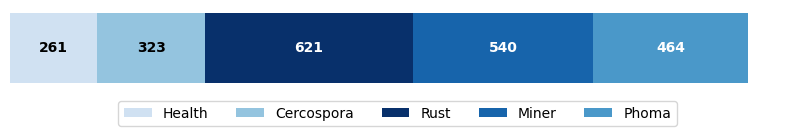

In [18]:
fig, ax = plt.subplots(figsize=(10, 1))
colors = cm.get_cmap("Blues", 6)            

ax.barh("BRACOL", 261, label="Health", color=colors(0.2))
ax.barh("BRACOL", 323, left=261, label="Cercospora", color=colors(0.4))
ax.barh("BRACOL", 621, left=261 + 323, label="Rust", color=colors(1.0))
ax.barh("BRACOL", 540, left=261 + 323 + 621, label="Miner", color=colors(0.8))
ax.barh("BRACOL", 464, left=261 + 323 + 621 + 540, label="Phoma", color=colors(0.6))

ax.text(261/2, 0, str(261), ha="center", va="center", weight="bold", size=10)
ax.text(261 + 323/2, 0, str(323), ha="center", va="center", weight="bold", size=10)
ax.text(261 + 323 + 621/2, 0, str(621), ha="center", va="center", color='w', weight="bold", size=10)
ax.text(261 + 323 + 621 + 540/2, 0, str(540), ha="center", va="center", color='w', weight="bold", size=10)
ax.text(261 + 323 + 621 + 540 + 464/2, 0, str(464), ha="center", va="center", color='w', weight="bold", size=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

plt.savefig("./graphics/BRACOL_distribution_stacked_bar.jpg", dpi=115, bbox_inches="tight")
plt.show()

In [19]:
total_images = calculating_total_of_images(files_per_directory)
print(f"Total of images: {total_images} images")

Total of images: 2209 images


#### Quantifying images dimension for standardization

In [20]:
dimentions = {}

In [21]:
for root, _, files in os.walk(PATH_BRACOL):
    for file in files:
        try:
            image = Image.open(f"{root}/{file}")
            size = f"{image.size[0]} x {image.size[1]}"

            if size not in dimentions:
                dimentions[size] = 1
            else:
                dimentions[size] += 1
        except Exception as e:
            pass

In [22]:
for size in sorted(dimentions, key=dimentions.get, reverse=True):
    print(f"{size} = {dimentions[size]} images")

256 x 256 = 15 images
226 x 263 = 4 images
209 x 182 = 3 images
244 x 240 = 3 images
219 x 201 = 3 images
176 x 158 = 3 images
136 x 130 = 3 images
206 x 157 = 2 images
341 x 328 = 2 images
186 x 198 = 2 images
194 x 188 = 2 images
201 x 211 = 2 images
141 x 126 = 2 images
208 x 196 = 2 images
190 x 194 = 2 images
223 x 226 = 2 images
166 x 168 = 2 images
248 x 219 = 2 images
217 x 201 = 2 images
235 x 205 = 2 images
259 x 241 = 2 images
227 x 288 = 2 images
197 x 187 = 2 images
120 x 127 = 2 images
197 x 171 = 2 images
79 x 92 = 2 images
222 x 228 = 2 images
172 x 160 = 2 images
151 x 144 = 2 images
208 x 193 = 2 images
115 x 122 = 2 images
232 x 232 = 2 images
168 x 186 = 2 images
179 x 165 = 2 images
238 x 213 = 2 images
188 x 195 = 2 images
222 x 185 = 2 images
409 x 255 = 2 images
308 x 305 = 2 images
201 x 174 = 2 images
201 x 165 = 2 images
327 x 347 = 2 images
182 x 176 = 2 images
182 x 188 = 2 images
183 x 158 = 2 images
251 x 263 = 2 images
171 x 194 = 2 images
197 x 166 = 2 

### 3.2. Plant Patologies

#### Number of directories

In [23]:
directories = []

In [24]:
for root, _, _ in os.walk(PATH_PLANT_PATOLOGIES):
    directory = root.split('/')[3:]
    directory = '/'.join(directory)
    
    if (len(directory) > 0) and (".ipynb_checkpoints" not in directory):
        directories.append(directory)

In [25]:
print(PATH_PLANT_PATOLOGIES + f": {len(directories)} directory(ies)")
for directory in directories:
    print(f">> {directory}")

./datasets/plant_patologies: 2 directory(ies)
>> rust_xml_image
>> miner_img_xml


#### Number of images in each directories

In [26]:
files_per_directory = {}

In [27]:
for root, _, files in os.walk(PATH_PLANT_PATOLOGIES):
    path = os.path.join(root)
    
    if ".ipynb_checkpoints" not in path:
        files_per_directory[f"{root}"] = 0

        for file in files:
            filepath = os.path.join(root, file)

            try:
                with Image.open(filepath) as image:
                    files_per_directory[f"{root}"] += 1
            except Exception as e:
                pass

In [28]:
files_per_directory = {key: value for key, value in files_per_directory.items() if value != 0}

In [29]:
for directory in files_per_directory:
    print(f"{directory}: {files_per_directory[directory]} images")

./datasets/plant_patologies/rust_xml_image: 285 images
./datasets/plant_patologies/miner_img_xml: 257 images


#### Number of images per class

In [30]:
images_per_class = {}

In [31]:
for directory in files_per_directory:
    label = directory.split('/')[-1]
    
    if label not in images_per_class.keys():
        images_per_class[label] = files_per_directory[directory]
    else:
        images_per_class[label] += files_per_directory[directory]

In [32]:
for key in images_per_class:
    print(f"{key} = {images_per_class[key]} images")

rust_xml_image = 285 images
miner_img_xml = 257 images


#### Plotting images distribution between classes

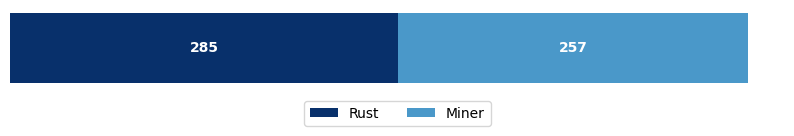

In [33]:
fig, ax = plt.subplots(figsize=(10, 1))
colors = cm.get_cmap("Blues", 6)            

ax.barh("Plant Patologies", 285, label="Rust", color=colors(1.0))
ax.barh("Plant Patologies", 257, left=285, label="Miner", color=colors(0.6))

ax.text(285/2, 0, str(285), ha="center", va="center", color='w', weight="bold", size=10)
ax.text(285 + 257/2, 0, str(257), ha="center", va="center", color='w', weight="bold", size=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

plt.savefig("./graphics/Plant_Patologies_distribution_stacked_bar.jpg", dpi=115, bbox_inches="tight")
plt.show()

In [34]:
total_images = calculating_total_of_images(files_per_directory)
print(f"Total of images: {total_images} images")

Total of images: 542 images


#### Quantifying images dimension for standardization

In [35]:
dimentions = {}

In [36]:
for root, _, files in os.walk(PATH_PLANT_PATOLOGIES):
    for file in files:
        try:
            image = Image.open(f"{root}/{file}")
            size = f"{image.size[0]} x {image.size[1]}"

            if size not in dimentions:
                dimentions[size] = 1
            else:
                dimentions[size] += 1
        except Exception as e:
            pass

In [37]:
for size in sorted(dimentions, key=dimentions.get, reverse=True):
    print(f"{size} = {dimentions[size]} images")

4000 x 2250 = 533 images
2549 x 3506 = 7 images
2250 x 4000 = 3 images


### 3.3. RoCoLe

In [38]:
directories = []

In [39]:
for root, _, _ in os.walk(PATH_ROCOLE):
    directory = root.split('/')[3:]
    directory = '/'.join(directory)
    
    if (len(directory) > 0) and (".ipynb_checkpoints" not in directory):
        directories.append(directory)

In [40]:
print(PATH_ROCOLE + f": {len(directories)} directory(ies)")
for directory in directories:
    print(f">> {directory}")

./datasets/rocole/Photos: 1 directory(ies)
>> Photos


#### Number of images in each directories

In [41]:
files_per_directory = {}

In [42]:
for root, _, files in os.walk(PATH_ROCOLE):
    path = os.path.join(root)
    
    if ".ipynb_checkpoints" not in path:
        files_per_directory[f"{root}"] = 0

        for file in files:
            filepath = os.path.join(root, file)

            try:
                with Image.open(filepath) as image:
                    files_per_directory[f"{root}"] += 1
            except Exception as e:
                pass

In [43]:
files_per_directory = {key: value for key, value in files_per_directory.items() if value != 0}

In [44]:
for directory in files_per_directory:
    print(f"{directory}: {files_per_directory[directory]} images")

./datasets/rocole/Photos: 1560 images


#### Separating images by class

In [45]:
path_classes_info = DATASETS_FOLDER + "/rocole/Annotations/RoCoLe-classes.xlsx"

In [46]:
classes_info = pd.read_excel(path_classes_info)
classes_info

,File,Binary.Label,Multiclass.Label
0,C1P1H1.jpg,healthy,healthy
1,C1P2E2.jpg,unhealthy,rust_level_2
2,C1P2H1.jpg,healthy,healthy
3,C1P3E1.jpg,healthy,healthy
4,C1P3E2.jpg,unhealthy,rust_level_2
...,...,...,...
1555,C12P40E2.jpg,unhealthy,rust_level_1
1556,C12P40H1.jpg,healthy,healthy
1557,C12P40H2.jpg,unhealthy,rust_level_1
1558,C8P24E2.jpg,unhealthy,rust_level_3


In [47]:
path_rocole_classes = DATASETS_FOLDER + "/rocole/classes"

In [48]:
if not os.path.exists(path_rocole_classes):
    os.mkdir(path_rocole_classes)

In [49]:
files = os.listdir(PATH_ROCOLE)
for file in tqdm(files, "Separating images by class"):
    try:
        label = classes_info["Multiclass.Label"].loc[classes_info["File"] == file].iloc[0]

        if "rust" in label:
            label = label.split('_')[0]

        path_label = f"{path_rocole_classes}/{label}"

        if not os.path.exists(path_label):
            os.mkdir(path_label)

        source = f"{PATH_ROCOLE}/{file}"
        destination = f"{path_label}/{file}"
        shutil.copy(source, destination)
    except Exception as e:
        print(e)

Separating images by class:  55%|██████████████████████████████████████████▊                                   | 858/1561 [00:00<00:00, 1201.04it/s]

single positional indexer is out-of-bounds


Separating images by class: 100%|█████████████████████████████████████████████████████████████████████████████| 1561/1561 [00:01<00:00, 1166.55it/s]


#### Number of images per class

In [50]:
images_per_class = {}

In [51]:
classes = os.listdir(path_rocole_classes)

for label in classes:
    images_per_class[label] = len(os.listdir(f"{path_rocole_classes}/{label}"))

In [52]:
for key in images_per_class:
    print(f"{key} = {images_per_class[key]} images")

rust = 602 images
healthy = 791 images
red_spider_mite = 167 images


#### Plotting images distribution between classes

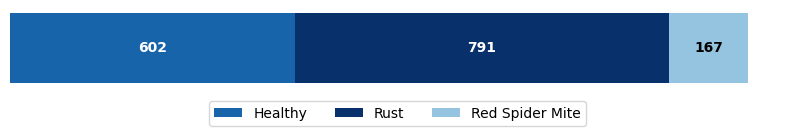

In [53]:
fig, ax = plt.subplots(figsize=(10, 1))
colors = cm.get_cmap("Blues", 6)            

ax.barh("RoCoLe", 602, label="Healthy", color=colors(0.8))
ax.barh("RoCoLe", 791, left=602, label="Rust", color=colors(1.0))
ax.barh("RoCoLe", 167, left=602+791, label="Red Spider Mite", color=colors(0.4))

ax.text(602/2, 0, str(602), ha="center", va="center", color='w', weight="bold", size=10)
ax.text(602 + 791/2, 0, str(791), ha="center", va="center", color='w', weight="bold", size=10)
ax.text(602 + 791 + 167/2, 0, str(167), ha="center", va="center", weight="bold", size=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

plt.savefig("./graphics/RoCoLe_distribution_stacked_bar.jpg", dpi=115, bbox_inches="tight")
plt.show()

In [54]:
total_images = calculating_total_of_images(files_per_directory)
print(f"Total of images: {total_images} images")

Total of images: 1560 images


#### Quantifying images dimension for standardization

In [55]:
dimentions = {}

In [56]:
for root, _, files in os.walk(PATH_ROCOLE):
    for file in files:
        try:
            image = Image.open(f"{root}/{file}")
            size = f"{image.size[0]} x {image.size[1]}"

            if size not in dimentions:
                dimentions[size] = 1
            else:
                dimentions[size] += 1
        except Exception as e:
            pass

In [57]:
for size in sorted(dimentions, key=dimentions.get, reverse=True):
    print(f"{size} = {dimentions[size]} images")

2048 x 1152 = 769 images
1280 x 720 = 479 images
4128 x 2322 = 313 images
